# Gradient Boosting Classifier

Objective: Class Prediction using Gradient Boost Classifier  
Dataset: voice.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('voice.csv')
print(data.shape)
data.head()

(3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Exploration

female    1584
male      1584
Name: label, dtype: int64


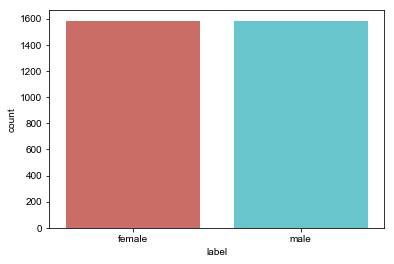

In [2]:
print(data['label'].value_counts())

sns.countplot(x='label',data = data, palette='hls',order = data['label'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [3]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Convert Categorical to Numerical

In [4]:
data["label"] = data["label"].astype('category')
data["label*"] = data["label"].cat.codes  

data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,label*
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,1


## Correlation

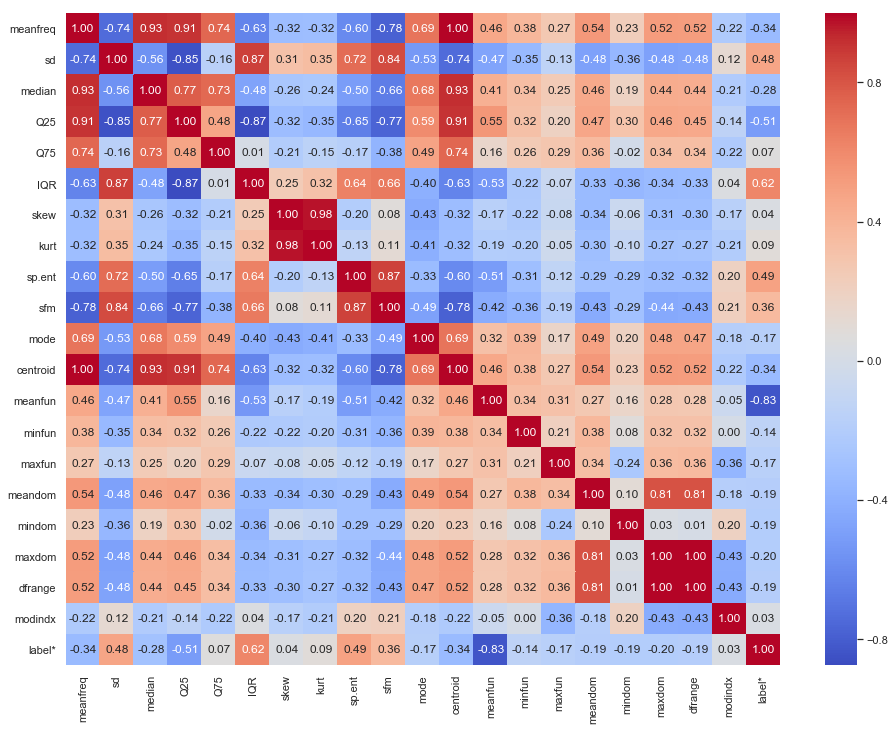

In [5]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["label*"].sort_values(ascending=False)

label*      1.000000
IQR         0.618916
sp.ent      0.490552
sd          0.479539
sfm         0.357499
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
minfun     -0.136692
maxfun     -0.166461
mode       -0.171775
meandom    -0.191067
dfrange    -0.192213
mindom     -0.194974
maxdom     -0.195657
median     -0.283919
centroid   -0.337415
meanfreq   -0.337415
Q25        -0.511455
meanfun    -0.833921
Name: label*, dtype: float64

## Data Processing and Selection

In [7]:
X = data.iloc[:, 0:20].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (3168, 20)


array([[5.97809850e-02, 6.42412677e-02, 3.20269134e-02, 1.50714886e-02,
        9.01934399e-02, 7.51219512e-02, 1.28634618e+01, 2.74402906e+02,
        8.93369417e-01, 4.91917766e-01, 0.00000000e+00, 5.97809850e-02,
        8.42791064e-02, 1.57016683e-02, 2.75862069e-01, 7.81250000e-03,
        7.81250000e-03, 7.81250000e-03, 0.00000000e+00, 0.00000000e+00],
       [6.60087404e-02, 6.73100288e-02, 4.02287348e-02, 1.94138670e-02,
        9.26661901e-02, 7.32523231e-02, 2.24232854e+01, 6.34613855e+02,
        8.92193242e-01, 5.13723843e-01, 0.00000000e+00, 6.60087404e-02,
        1.07936554e-01, 1.58259149e-02, 2.50000000e-01, 9.01442308e-03,
        7.81250000e-03, 5.46875000e-02, 4.68750000e-02, 5.26315789e-02]])

In [8]:
y = data.iloc[:, -1].values
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (3168,)


array([1, 1, 1, 1, 1], dtype=int8)

## Data Normalization

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (3168, 20)


array([[-4.04924806,  0.4273553 , -4.22490077, -2.57610164, -5.69360723,
        -0.21477826,  2.29330585,  1.76294635, -0.03908279,  0.4715753 ,
        -2.14121031, -4.04924806, -1.81203825, -1.0979981 ,  0.56595854,
        -1.5642046 , -0.70840431, -1.43142165, -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, -2.48688452, -5.58898726,
        -0.25848536,  4.54805598,  4.43300778, -0.06523603,  0.59443122,
        -2.14121031, -3.84105325, -1.07959443, -1.09153262, -0.29403034,
        -1.56191576, -0.70840431, -1.41810716, -1.4058184 , -1.01410294]])

## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (2217, 20) (2217,)
X TEST Set :  (951, 20) (951,)


## Gradient Boosting Classifier

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

from sklearn import metrics
print("R-Square               :", round(metrics.r2_score(y_test, y_pred),4))
print('Mean Absolute Error    :', round(metrics.mean_absolute_error(y_test, y_pred),4))  
print('Mean Squared Error     :', round(metrics.mean_squared_error(y_test, y_pred),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4)) 
#print("Accuracy score         :", round(gb.score(X_test, y_test),4))
print("Accuracy               :", round(metrics.accuracy_score(y_test, y_pred),4))
print("Precision              :", round(metrics.precision_score(y_test, y_pred),4))
print("Recall                 :", round(metrics.recall_score(y_test, y_pred),4))

R-Square               : 0.8905
Mean Absolute Error    : 0.0273
Mean Squared Error     : 0.0273
Root Mean Squared Error: 0.1653
Accuracy               : 0.9727
Precision              : 0.9699
Recall                 : 0.9777


## Data Prediction

In [12]:
df_pred1 = data[data.index == 2]
df_pred2 = data[data.index == 3100]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,label*
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,1
3100,0.163728,0.055457,0.167458,0.160413,0.188594,0.028181,5.852808,43.350710,0.876720,0.460331,...,0.148630,0.020040,0.212766,0.692817,0.166016,3.930664,3.764648,0.288137,female,0


In [13]:
Xhat = df_pred.iloc[:, 0:20].values
Xhat = scaler.transform(Xhat)

yhat = data.iloc[:, -1].values

In [14]:
GB_pred = gb.predict(Xhat)
GB_pred

array([1, 0], dtype=int8)